In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [16]:
%matplotlib notebook

In [17]:
#creates an array of random normalized numbers (creates the white noise)
mean = 0.0
std = 1
num_samples = 1000
ninstances = 100
Allsamples = np.zeros((num_samples,ninstances))
for i in range(ninstances):
    samples = np.random.normal(mean, std, size=num_samples)
    Allsamples[:,i] = samples

# plt.figure(0)
# for i in range(ninstances):
#     plt.plot(Allsamples[:,i])

<IPython.core.display.Javascript object>


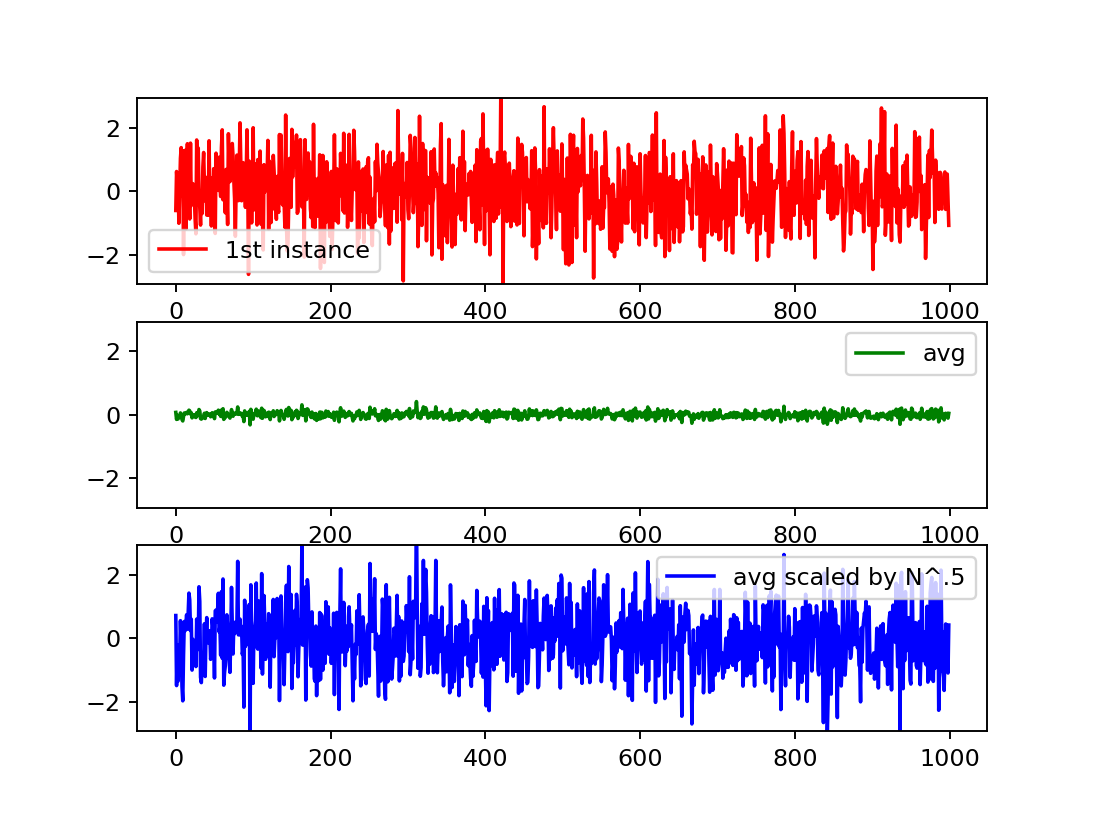

In [18]:
yscalemax = np.max(Allsamples[:,0])

#averages those normalized numbers
avgsample = np.average(Allsamples,axis=1)
plt.figure()

plt.subplot(311)
plt.plot(Allsamples[:,0],label='1st instance',color='red')
plt.ylim([-yscalemax,yscalemax])
plt.legend()

#this is a plot of those averaged numbers
plt.subplot(312)
plt.plot(avgsample,label='avg',color='green')
plt.ylim([-yscalemax,yscalemax])
plt.legend()

#this is a plot of the square root of those averaged numbers
plt.subplot(313)
plt.plot(avgsample*ninstances**.5,label='avg scaled by N^.5',color='blue')
plt.ylim([-yscalemax,yscalemax])
plt.legend()

In [19]:
# #This takes the "fast fourier transform" of the avgsample of white noise previously used and so to my knowledge puts our white noise in the frequency domain
# ft_samples = np.fft.fft(avgsample)
# ft_freq = 1/(ft_samples)

# plt.figure(1)
# plt.subplot(211)
# plt.plot(ft_samples, label='frequency', color='red')
# plt.legend()

# #This is a plot of 1/f or the 1/frequencies
# plt.subplot(212)
# plt.plot(ft_freq, label='1/f', color='blue')
# plt.legend()

# plt.figure(2)
# #got the idea to do the following two graphs from this website, not too sure how they got here but I figured it was worth a shot
# #https://physics.stackexchange.com/questions/16862/generating-pink-noise
# ft_freq2 = 1/(ft_samples**0.5)
# ft_samples2 = np.fft.ifft(ft_freq2)
# ft_samples3 = np.fft.fft(ft_freq2)
# plt.subplot(211)
# plt.plot(ft_samples2, label='1/(f^0.5)', color='blue')
# plt.subplot(212)

# plt.plot(ft_samples3, label='1/(f^0.5)', color='blue')

In [20]:
# Generate a time series for a sinusoidal signal
# omega = 2
# tmax =  50/omega
# t = np.linspace(0,tmax,npts)
# foft = np.cos(np.pi*2*omega*t)



In [25]:
def givemeflicker(t,std):
    
    # Lay out the time axis
    dt = t[1]-t[0]; #print(dt)

    # Make a time-dependent white noise variable
    mean = 0
    #std = 1
    foft = np.random.normal(mean, std, size=len(t))
    #plt.figure(); plt.plot(t,foft,'-')
    #plt.xlabel('time')

    # FT it
    sp = np.fft.fft(foft)
    freq = np.fft.fftfreq(t.shape[-1])/dt

    # Modulate the amplitude 
    freq[0]=1e-10
    sp3 = sp/np.abs(freq)**.5
    #sp3 = sp/np.abs(freq)
    
    # Zero out the DC component (mean)
    sp3[0] = 0

    # IFFT it
    isp = np.real(np.fft.ifft(sp3))
    #plt.figure()
    #plt.plot(t, isp)
    #plt.grid(True)
    #plt.xlabel('time')

    return isp

<IPython.core.display.Javascript object>


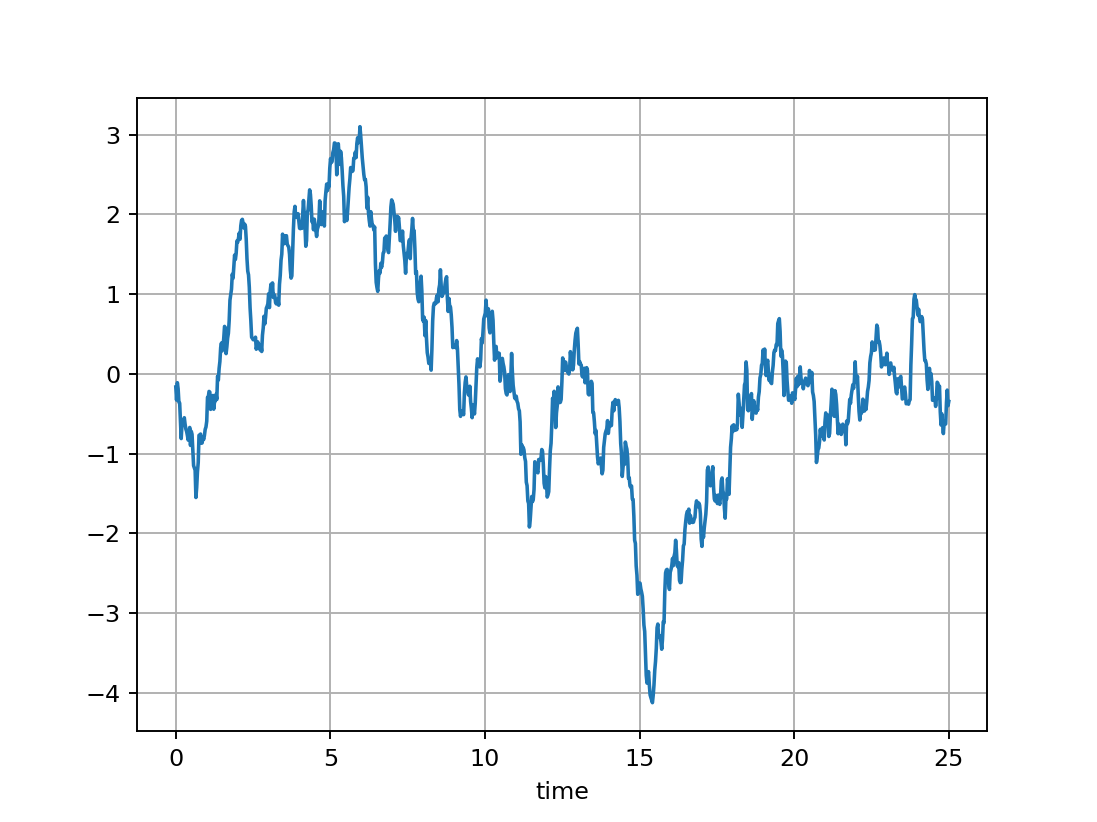

Text(0.5,0,'time')

In [26]:
t = np.linspace(0,25,1000)
std = 1
myflickersignal = givemeflicker(t,std)

plt.figure()
plt.plot(t, myflickersignal)
plt.grid(True)
plt.xlabel('time')


In [23]:
#creates an array of random normalized numbers (creates the white noise)
std = 1
num_samples = 1000
ninstances = 100
t = np.linspace(0,25,num_samples)
Allsamples = np.zeros((num_samples,ninstances))
for i in range(ninstances):
    samples = givemeflicker(t,std)
    Allsamples[:,i] = samples

# plt.figure(0)
# for i in range(ninstances):
#     plt.plot(Allsamples[:,i])

<IPython.core.display.Javascript object>


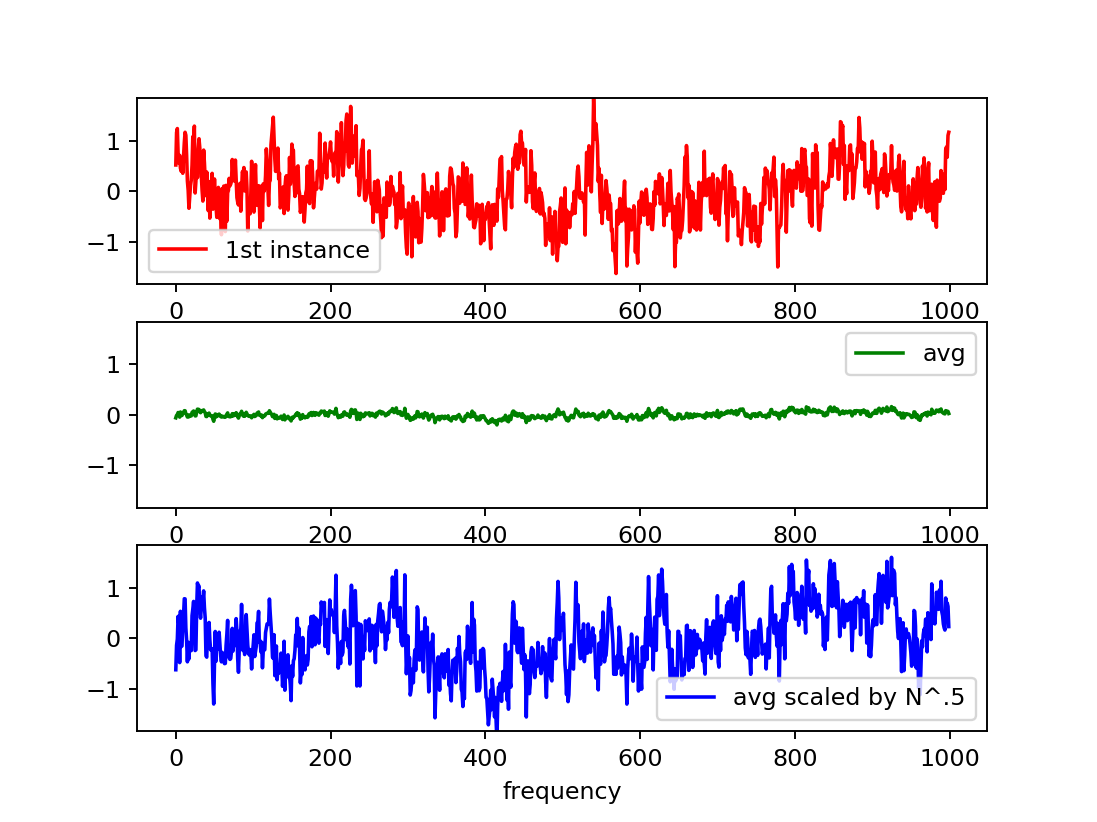

In [27]:
yscalemax = np.max(Allsamples[:,0])

#averages those normalized numbers
avgsample = np.average(Allsamples,axis=1)
plt.figure()

plt.subplot(311)
plt.plot(Allsamples[:,0],label='1st instance',color='red')
plt.ylim([-yscalemax,yscalemax])
plt.legend()

#this is a plot of those averaged numbers
plt.subplot(312)
plt.plot(avgsample,label='avg',color='green')
plt.ylim([-yscalemax,yscalemax])
plt.legend()

#this is a plot of the square root of those averaged numbers
plt.subplot(313)
plt.plot(avgsample*ninstances**.5,label='avg scaled by N^.5',color='blue')
plt.ylim([-yscalemax,yscalemax])
plt.legend()

In [28]:
def powerspectrum(t,somefoft):
    dt = t[1]-t[0]
    freq = np.fft.fftfreq(t.shape[-1])/dt
    freq2 = np.fft.fftshift(freq)
    sp = np.fft.fft(somefoft)
    sp2 = np.fft.fftshift(sp)
    
#     plt.figure()
#     plt.plot(freq2, sp2.real, freq2, sp2.imag)
#     plt.grid(True)
    plt.xlabel('frequency')
    
    powerspec = sp2.real**2 + sp2.imag**2
    powerspec2 = np.fft.fftshift(powerspec)
#     plt.figure()
#     plt.plot(freq2, powerspec2)
#     plt.grid(True)
#     plt.xlabel('frequency')
    
    return freq2, powerspec2

<IPython.core.display.Javascript object>


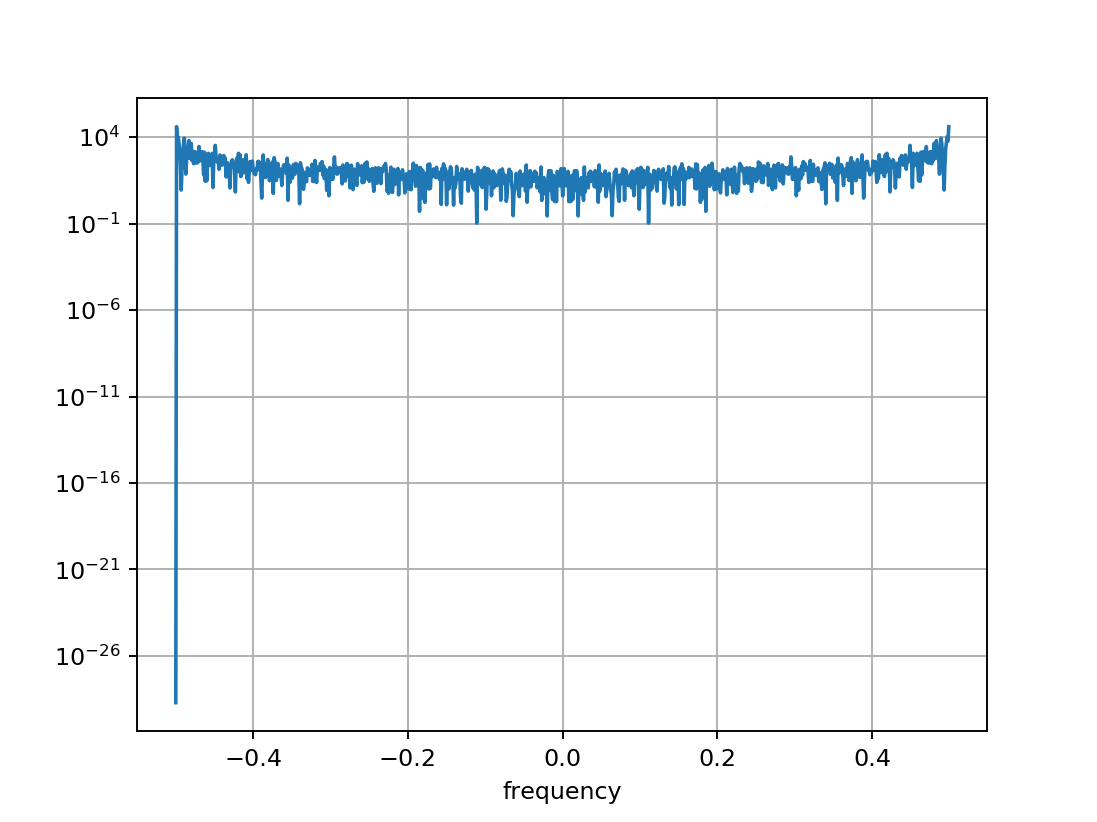

Text(0.5,0,'frequency')

In [29]:
mywhitenoise = avgsample*ninstances**.5
x = np.arange(len(mywhitenoise))
myfreqwhite, mypowerwhite = powerspectrum(x,mywhitenoise)
plt.figure()
plt.semilogy(myfreqwhite, mypowerwhite)
plt.grid(True)
plt.xlabel('frequency')

<IPython.core.display.Javascript object>


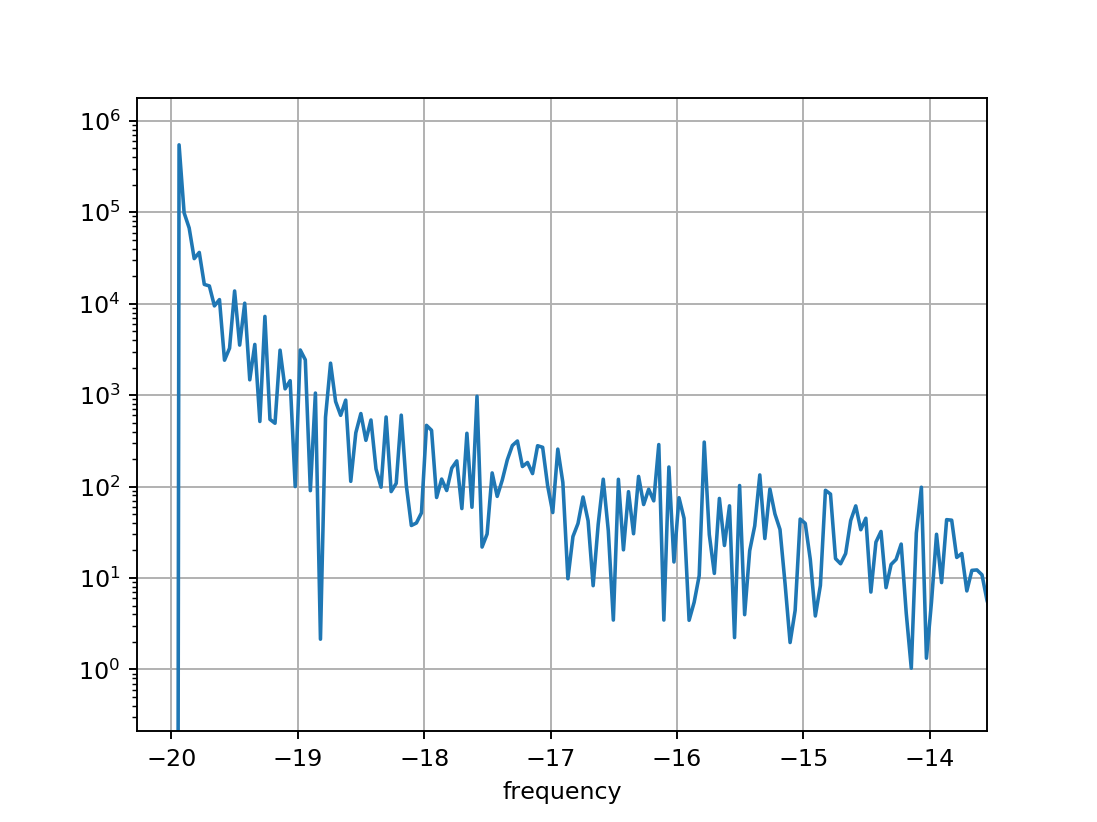

Text(0.5,0,'frequency')

In [30]:
myfreqflicker, mypowerflicker = powerspectrum(t,myflickersignal)
plt.figure()
plt.semilogy(myfreqflicker, mypowerflicker)
plt.grid(True)
plt.xlabel('frequency')

/Users/nesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


<IPython.core.display.Javascript object>


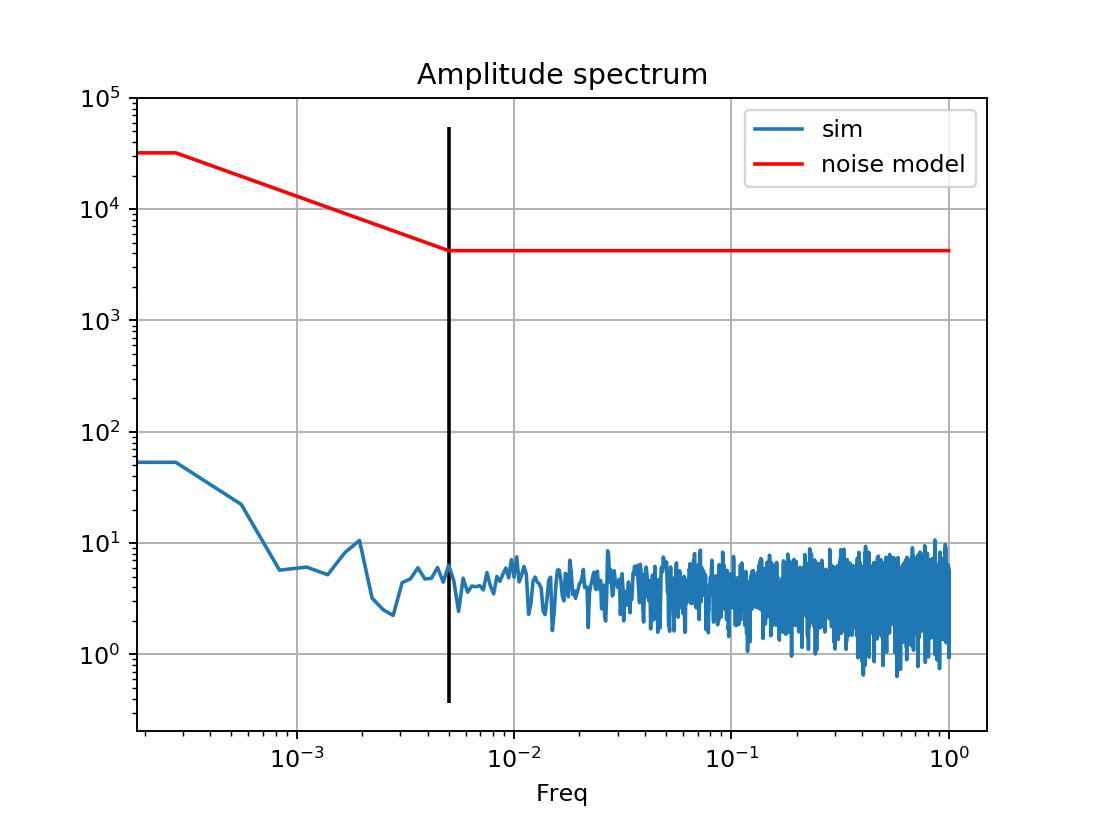

In [31]:

#downloaded from https://gist.github.com/zonca/979729 
from matplotlib import mlab

def one_over_f(f, knee, alpha):
    desc = np.ones_like(f)
    desc[f<KNEE] = np.abs((f[f<KNEE]/KNEE)**(-alpha))
    desc[0] = 1
    return desc

white_noise_sigma =  3 #mK * sqrt(s)

SFREQ = 2 #Hz
KNEE = 5 / 1e3 #Hz
ALPHA = .7
N = SFREQ * 3600 * 2 # 4 hours

#generate white noise in time domain
wn=np.random.normal(0.,white_noise_sigma*np.sqrt(SFREQ),N)

#shaping in freq domain
s = np.fft.rfft(wn)
f = np.fft.fftfreq(N, d=1./SFREQ)[:len(s)]
f[-1]=np.abs(f[-1])
fft_sim = s * one_over_f(f, KNEE, ALPHA)
T_sim = np.fft.irfft(fft_sim)

#PSD - 1 hour window
NFFT = int(SFREQ*60*60*1)
s_sim, f_sim  = mlab.psd(T_sim, NFFT=NFFT, Fs=SFREQ, scale_by_freq=True)

#plot
plt.figure()
plt.plot(f_sim, np.sqrt(s_sim), label='sim')
plt.loglog(f_sim, one_over_f(f_sim, KNEE, ALPHA) * white_noise_sigma*1e3*np.sqrt(2), 'r',label='noise model')
plt.vlines(KNEE,*plt.ylim())
plt.grid(); plt.xlabel('Freq'); plt.title('Amplitude spectrum'); plt.legend()